<a href="https://colab.research.google.com/github/acgowda/market-flow/blob/main/model/model_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# df = pd.read_csv('/content/drive/Shareddrives/PIC 16B Project/stock_data3.csv')
train = pd.read_csv('/content/drive/Shareddrives/PIC 16B Project/daily_train_17-22.csv')
test = pd.read_csv('/content/drive/Shareddrives/PIC 16B Project/daily_test_2mo.csv')

In [4]:
train.head()

,Date,open,high,low,close,volume,ma5,ma20,ma60,ma200,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2019-05-15,-0.002246,-0.004708,-0.005828,0.012641,0.084964,-0.001974,-0.001104,0.000575,0.000334,...,0,0,0,0,0,0,0,0,0,0
1,2021-11-26,-0.030833,-0.057339,-0.055760,0.022795,0.445857,-0.000889,-0.000481,0.005645,0.002421,...,0,0,0,0,0,0,0,0,0,0
2,2018-11-27,0.002172,0.000866,0.002079,0.005537,0.240568,-0.002984,0.001689,0.000940,0.000911,...,0,0,0,0,0,0,0,0,0,0
3,2021-04-30,0.004319,-0.002106,-0.000713,0.007457,0.328617,-0.005105,0.001125,0.002052,0.001222,...,0,0,0,0,0,0,0,0,0,0
4,2017-12-20,0.004885,0.003506,-0.010445,0.014390,0.272972,0.003867,0.003885,0.001778,0.000665,...,0,0,0,0,0,0,0,0,0,0


In [5]:
high_change_cols = list(train.describe().loc['max'][train.describe().loc['max'] > 10].index)
drop_cols = ['Date'] + high_change_cols
drop_cols

['Date', 'volume', '^FTSE-volume', '^FCHI-volume', 'GC=F-volume']

In [6]:
def get_Xy(df):
    new = df.drop(drop_cols, axis = 1)
    new['target'] = new['close'].apply(lambda x: 1 if x > 0 else 0)
    new = new.drop(['close'], axis = 1)
    
    return new.drop(columns=['target']), new['target']

In [7]:
X, y = get_Xy(train)

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y,
                                                  random_state = 42,
                                                  test_size = 0.3)

In [8]:
X.columns

Index(['open', 'high', 'low', 'ma5', 'ma20', 'ma60', 'ma200', '^GSPC-close',
       '^GSPC-volume', '^GSPC-ma5', '^GSPC-ma20', '^GSPC-ma60', '^GSPC-ma200',
       '^VIX-close', '^VIX-ma5', '^VIX-ma20', '^VIX-ma60', '^VIX-ma200',
       '^IXIC-close', '^IXIC-volume', '^IXIC-ma5', '^IXIC-ma20', '^IXIC-ma60',
       '^IXIC-ma200', '^DJI-close', '^DJI-volume', '^DJI-ma5', '^DJI-ma20',
       '^DJI-ma60', '^DJI-ma200', '^HSI-close', '^HSI-volume', '^HSI-ma5',
       '^HSI-ma20', '^HSI-ma60', '^HSI-ma200', '^FTSE-close', '^FTSE-ma5',
       '^FTSE-ma20', '^FTSE-ma60', '^FTSE-ma200', '^FCHI-close', '^FCHI-ma5',
       '^FCHI-ma20', '^FCHI-ma60', '^FCHI-ma200', 'GC=F-close', 'GC=F-ma5',
       'GC=F-ma20', 'GC=F-ma60', 'GC=F-ma200', 'CL=F-close', 'CL=F-volume',
       'CL=F-ma5', 'CL=F-ma20', 'CL=F-ma60', 'CL=F-ma200', 'day_1', 'day_2',
       'day_3', 'day_4', 'day_5', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       

In [9]:
X.shape

(428018, 74)

In [60]:
model = tf.keras.models.Sequential([
    layers.Dense(128, input_shape=(74,), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(2)
])

In [61]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 10, batch_size = 64, 
                    shuffle = True, verbose=1)

Epoch 1/10
4682/4682 [==============================] - 21s 4ms/step - loss: 0.7117 - accuracy: 0.5113 - val_loss: 0.6962 - val_accuracy: 0.4651
Epoch 2/10
4682/4682 [==============================] - 20s 4ms/step - loss: 0.6854 - accuracy: 0.5439 - val_loss: 0.6874 - val_accuracy: 0.5419
Epoch 3/10
4682/4682 [==============================] - 21s 5ms/step - loss: 0.6721 - accuracy: 0.5679 - val_loss: 0.7107 - val_accuracy: 0.4820
Epoch 4/10
4682/4682 [==============================] - 22s 5ms/step - loss: 0.6612 - accuracy: 0.5847 - val_loss: 0.7524 - val_accuracy: 0.4797
Epoch 5/10
4682/4682 [==============================] - 20s 4ms/step - loss: 0.6534 - accuracy: 0.5974 - val_loss: 0.7720 - val_accuracy: 0.4812
Epoch 6/10
4682/4682 [==============================] - 20s 4ms/step - loss: 0.6482 - accuracy: 0.6050 - val_loss: 0.7521 - val_accuracy: 0.4695
Epoch 7/10
4682/4682 [==============================] - 20s 4ms/step - loss: 0.6429 - accuracy: 0.6113 - val_loss: 0.7549 - val_ac

In [12]:
def plot_history(hist):
    plt.plot(hist.history["accuracy"], label = "training")
    plt.plot(hist.history["val_accuracy"], label = "validation")
    plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
    plt.legend()
    plt.show()

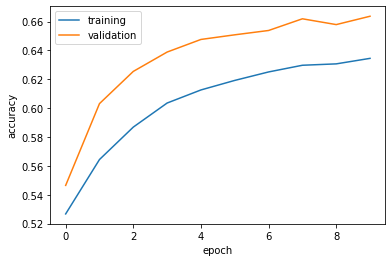

In [53]:
plot_history(history)

In [43]:
test.head()

,Date,open,high,low,close,volume,ma5,ma20,ma60,ma200,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2022-04-12,0.003907,0.001617,0.006849,0.009239,0.034329,-0.001325,-0.000168,-0.003352,-0.000764,...,0,0,0,0,0,0,0,0,0,0
1,2022-04-12,0.002190,-0.004278,0.000588,0.007450,-0.090065,-0.012964,-0.002295,-0.003534,-0.000513,...,0,0,0,0,0,0,0,0,0,0
2,2022-05-16,0.018544,0.034064,0.030342,0.012754,0.011737,0.015043,0.001381,0.002533,0.002596,...,0,0,0,0,0,0,0,0,0,0
3,2022-05-19,-0.046616,-0.032033,-0.009348,0.026028,0.124463,-0.005932,-0.006329,-0.003017,-0.001846,...,0,0,0,0,0,0,0,0,0,0
4,2022-06-16,-0.012085,-0.007838,-0.014000,0.004648,0.014978,-0.007895,-0.001115,0.000910,0.000517,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X_test, y_test = get_Xy(test)

In [54]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy :', accuracy)

552/552 [==============================] - 1s 2ms/step - loss: 0.7459 - accuracy: 0.5179
Test accuracy : 0.5178976058959961


In [ ]:
model.save('/content/drive/Shareddrives/PIC 16B Project/model_week')

INFO:tensorflow:Assets written to: /content/drive/Shareddrives/PIC 16B Project/model_week/assets
